In [66]:
# Loading both train and test files into seperate DataFrames

import pandas as pd

train_df = pd.read_csv('/kaggle/input/housing/train.csv')
test_df = pd.read_csv('/kaggle/input/housing/test.csv')


In [67]:
# Display the 5 first rows of the datasets
print(train_df.head())
print(test_df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [68]:
# Review basic information (data types, missing values) and summary statistics
print("\nTraining Data Info:")
print(train_df.info())
print("\nTest Data Info:")
print(test_df.info())


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   

In [69]:
print("\nTraining Data Summary Statistics:")
print(train_data.describe())
print("\nTest Data Summary Statistics:")
print(test_data.describe())


Training Data Summary Statistics:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.6

In [70]:
# Task 2 for the train_df

# 1. Identify columns with missing values in the training dataset
train_missing_values = train_df.isnull().sum()
train_missing_columns = train_missing_values[train_missing_values > 0]
print("Columns with missing values in the training dataset:\n", train_missing_columns)

# Separate columns with missing values by data type
train_numerical_missing = train_df[train_missing_columns.index].select_dtypes(include=['float64', 'int64'])
train_categorical_missing = train_df[train_missing_columns.index].select_dtypes(include=['object'])

# 2. Impute missing values
# For numerical columns, use median imputation
for column in train_numerical_missing.columns:
    train_df[column] = train_df[column].fillna(train_df[column].median())

# For categorical columns, use mode imputation
for column in train_categorical_missing.columns:
    train_df[column] = train_df[column].fillna(train_df[column].mode()[0])

# 3. Verify if all missing values have been addressed
train_missing_values_after_imputation = train_df.isnull().sum()
train_missing_columns_after_imputation = train_missing_values_after_imputation[train_missing_values_after_imputation > 0]
print("\nColumns with missing values after imputation in the training dataset:\n", train_missing_columns_after_imputation)

Columns with missing values in the training dataset:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Columns with missing values after imputation in the training dataset:
 Series([], dtype: int64)


In [71]:
# Task 2 for test_df

# 1. Identify columns with missing values in the test dataset
test_missing_values = test_df.isnull().sum()
test_missing_columns = test_missing_values[test_missing_values > 0]
print("Columns with missing values in the test dataset:\n", test_missing_columns)

# Separate columns with missing values by data type
test_numerical_missing = test_df[test_missing_columns.index].select_dtypes(include=['float64', 'int64'])
test_categorical_missing = test_df[test_missing_columns.index].select_dtypes(include=['object'])

# 2. Impute missing values
# For numerical columns, use median imputation
for column in test_numerical_missing.columns:
    test_df[column] = test_df[column].fillna(test_df[column].median())

# For categorical columns, use mode imputation
for column in test_categorical_missing.columns:
    test_df[column] = test_df[column].fillna(test_df[column].mode()[0])

# 3. Verify if all missing values have been addressed
test_missing_values_after_imputation = test_df.isnull().sum()
test_missing_columns_after_imputation = test_missing_values_after_imputation[test_missing_values_after_imputation > 0]
print("\nColumns with missing values after imputation in the test dataset:\n", test_missing_columns_after_imputation)

Columns with missing values in the test dataset:
 MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

Columns with missing values after imputation in the test dataset:
 Series([], dtype: int64)


In [72]:
#Task 3
import pandas as pd

# Check initial shape of train and test datasets before encoding
initial_train_shape = train_df.shape
initial_test_shape = test_df.shape

# Perform One-Hot Encoding on categorical variables in both datasets, directly modifying train_df and test_df
train_df = pd.get_dummies(train_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

# Align the test dataset to match the training dataset's columns
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

# Check shapes after encoding
encoded_train_shape = train_df.shape
encoded_test_shape = test_df.shape

# Print initial and encoded shapes for verification
print("Initial shape of train dataset:", initial_train_shape)
print("Initial shape of test dataset:", initial_test_shape)
print("Encoded shape of train dataset:", encoded_train_shape)
print("Encoded shape of test dataset:", encoded_test_shape)




Initial shape of train dataset: (1460, 81)
Initial shape of test dataset: (1459, 80)
Encoded shape of train dataset: (1460, 246)
Encoded shape of test dataset: (1459, 246)


In [73]:
#Task 4

import numpy as np

# Function to detect and remove outliers using the IQR method
def treat_outliers_iqr(data, threshold=1.5):
    """Detect and remove outliers from numerical columns in a DataFrame using the IQR method."""
    for column in data.select_dtypes(include=[np.number]).columns:  # Only process numerical columns
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        # Filter data to keep only values within the IQR range
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Print initial shapes of train and test datasets
print("Initial shape of train dataset:", train_df.shape)
print("Initial shape of test dataset:", test_df.shape)

# Apply the function to both train_df and test_df
train_df = treat_outliers_iqr(train_df)
test_df = treat_outliers_iqr(test_df)

# Print new shapes after outlier treatment
print("New shape of train dataset after outlier treatment:", train_df.shape)
print("New shape of test dataset after outlier treatment:", test_df.shape)


Initial shape of train dataset: (1460, 246)
Initial shape of test dataset: (1459, 246)
New shape of train dataset after outlier treatment: (548, 246)
New shape of test dataset after outlier treatment: (534, 246)


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

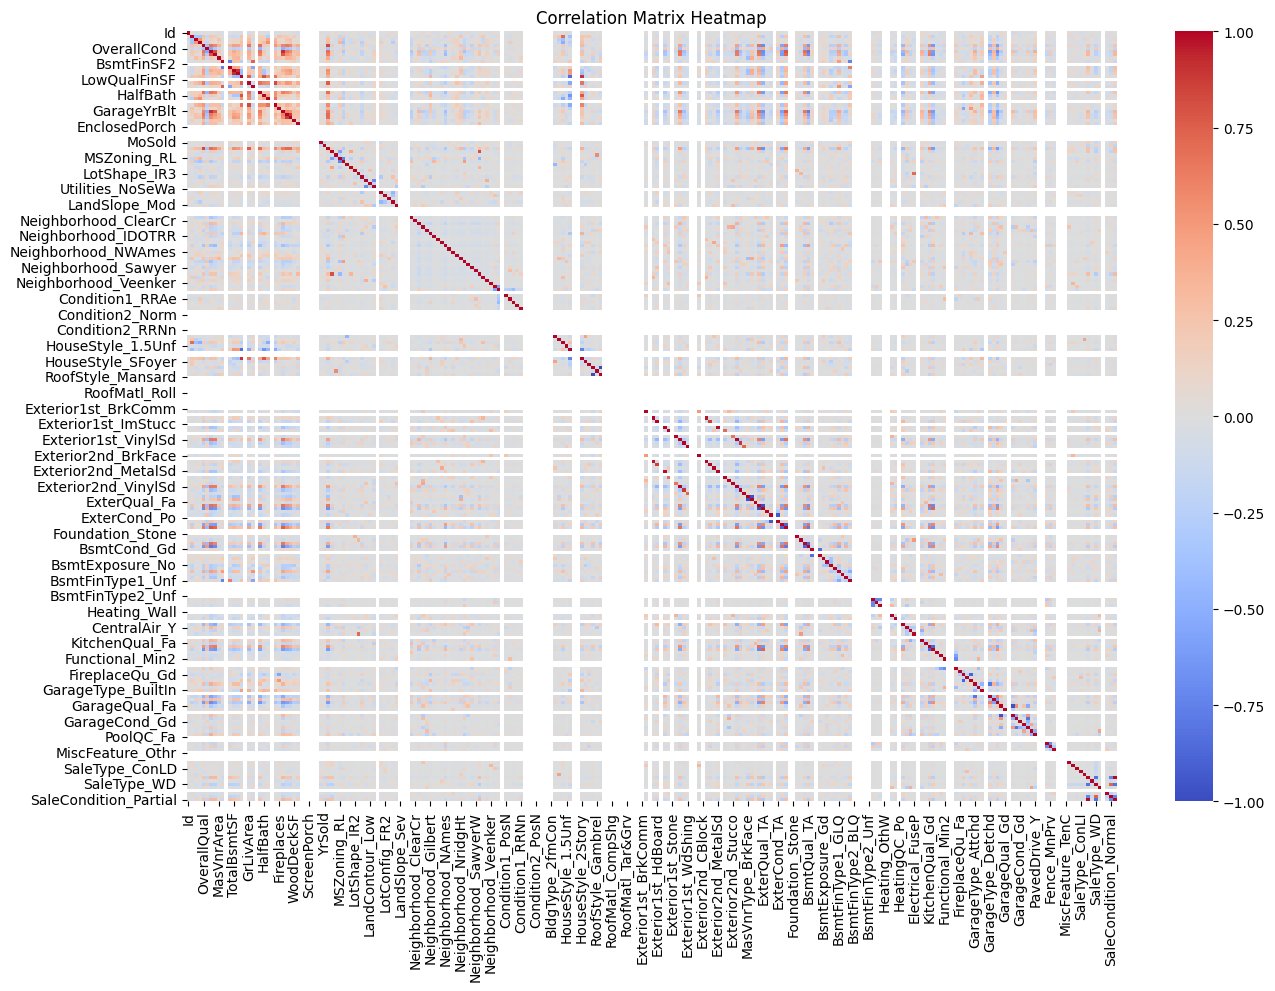

Initial shape of train dataset: (548, 246)
Initial shape of test dataset: (534, 246)
Dropped features due to high correlation: ['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'Neighborhood_Somerst', 'HouseStyle_2Story', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'SaleCondition_Partial']
New shape of train dataset after dropping correlated features: (548, 234)
New shape of test dataset after dropping correlated features: (534, 234)


In [75]:
# Task 5

# Step 1: Compute the correlation matrix
correlation_matrix = train_df.corr()

# Step 2: Visualize the correlation matrix with a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Print the initial shapes of train and test datasets
print("Initial shape of train dataset:", train_df.shape)
print("Initial shape of test dataset:", test_df.shape)

# Step 3: Identify and remove highly correlated features
# We only need to look at the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with a correlation greater than 0.8, excluding 'SalePrice'
high_correlation_features = [
    column for column in upper_triangle.columns if column != 'SalePrice' and any(upper_triangle[column] > 0.8)
]

# Drop these highly correlated features from train_df and test_df
train_df = train_df.drop(columns=high_correlation_features)
test_df = test_df.drop(columns=high_correlation_features)

# Print the list of dropped features and the new shapes of train and test datasets
print("Dropped features due to high correlation:", high_correlation_features)
print("New shape of train dataset after dropping correlated features:", train_df.shape)
print("New shape of test dataset after dropping correlated features:", test_df.shape)


In [76]:
#Task 6

# Polynomial Features: Squared terms for selected columns if they exist
if '1stFlrSF' in train_df.columns:
    train_df['1stFlrSF_squared'] = train_df['1stFlrSF'] ** 2
if '2ndFlrSF' in train_df.columns:
    train_df['2ndFlrSF_squared'] = train_df['2ndFlrSF'] ** 2
if 'TotalBsmtSF' in train_df.columns:
    train_df['TotalBsmtSF_squared'] = train_df['TotalBsmtSF'] ** 2
if 'GarageArea' in train_df.columns:
    train_df['GarageArea_squared'] = train_df['GarageArea'] ** 2

# Interaction terms between existing columns
if '1stFlrSF' in train_df.columns and '2ndFlrSF' in train_df.columns:
    train_df['1stFlrSF_2ndFlrSF'] = train_df['1stFlrSF'] * train_df['2ndFlrSF']
if 'TotalBsmtSF' in train_df.columns and 'GarageArea' in train_df.columns:
    train_df['TotalBsmtSF_GarageArea'] = train_df['TotalBsmtSF'] * train_df['GarageArea']

# Date-based features if YearBuilt and MoSold are available
if 'YearBuilt' in train_df.columns:
    train_df['DecadeBuilt'] = (train_df['YearBuilt'] // 10) * 10
if 'MoSold' in train_df.columns:
    train_df['SaleSeason'] = pd.cut(train_df['MoSold'], bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Fall'])

# Binning for continuous features if columns exist
if '1stFlrSF' in train_df.columns:
    train_df['1stFlrSF_bin'] = pd.cut(train_df['1stFlrSF'], bins=5, labels=[1, 2, 3, 4, 5])
if 'GarageArea' in train_df.columns:
    train_df['GarageArea_bin'] = pd.cut(train_df['GarageArea'], bins=4, labels=['Small', 'Medium', 'Large', 'Very Large'])


In [77]:
print(train_df.columns)


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       '2ndFlrSF_squared', 'TotalBsmtSF_squared', 'DecadeBuilt', 'SaleSeason'],
      dtype='object', length=238)


In [80]:
#Task 7 and 8

from sklearn.model_selection import train_test_split

# Ensure all categorical features are one-hot encoded in X before splitting
X = pd.get_dummies(train_df.drop(columns=['SalePrice']), drop_first=True)  # Drop target and one-hot encode
y = train_df['SalePrice']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)




Intercept: -1436521.78143987
Coefficients: [-8.09018131e-01 -4.57118944e+02 -2.60365525e+01  1.79516692e+00
  5.45511248e+03  5.64496673e+03  2.26922863e+02  1.33981065e+02
  5.92657391e+00 -2.17030372e+00 -9.53760066e-05 -1.93859171e+01
 -2.15561930e+01  1.40463300e+01 -1.32364854e-04  3.65921051e+01
  4.21722347e+02 -6.67161237e-05 -9.08735401e+02 -2.46347048e+03
 -1.98176795e+03  3.45439412e-05  3.91244085e+03  1.01218460e+04
  2.06436275e+01  7.18528888e+01  3.77650481e-05  1.91194304e-05
  8.82984386e-06 -9.52108894e-06  1.05257177e-05  5.08388829e+02
  2.73853718e+02  2.90753360e+03  1.54408054e+03  7.33530181e+02
 -5.18514432e+03 -1.18631085e+04 -1.34454475e+04 -8.54268706e+02
  1.19536088e+04  9.31686750e+02 -2.77478886e+03 -7.11569850e+03
 -2.75649012e+03  1.50976120e-10  1.79913066e+03 -9.64912187e+03
 -1.19958632e+04 -2.49916960e+03  1.54290564e+02  8.18545232e-11
 -4.00177669e-11 -9.45874490e-11  2.46159846e+03  1.01287371e+04
 -1.74684818e+04  4.47405929e+03 -1.68875359e+0

In [84]:
# Task 9
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict house prices on the validation set
y_pred = model.predict(X_val)

# Calculate evaluation metrics
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Display the results
print("Model Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)



Model Evaluation Metrics:
Mean Absolute Error (MAE): 14043.283413193893
Mean Squared Error (MSE): 335390140.55227923
R-squared (R²): 0.8643232192494099


In [88]:
#Task 10

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define higher alpha values and increased max_iter
alpha_values = [1.0, 5.0, 10.0, 20.0, 50.0]

# Ridge Regression with Grid Search and higher max_iter
ridge_model = Ridge(max_iter=20000)
ridge_grid = GridSearchCV(ridge_model, param_grid={'alpha': alpha_values}, cv=5, scoring='r2')
ridge_grid.fit(X_train_scaled, y_train)
best_ridge_model = ridge_grid.best_estimator_

# Lasso Regression with Grid Search and higher max_iter
lasso_model = Lasso(max_iter=20000)  # Further increased max_iter for Lasso
lasso_grid = GridSearchCV(lasso_model, param_grid={'alpha': alpha_values}, cv=5, scoring='r2')
lasso_grid.fit(X_train_scaled, y_train)
best_lasso_model = lasso_grid.best_estimator_

# Display the best alpha values
print("Best alpha for Ridge:", ridge_grid.best_params_['alpha'])
print("Best alpha for Lasso:", lasso_grid.best_params_['alpha'])

# Evaluate on the validation set using the best models
ridge_pred = best_ridge_model.predict(X_val_scaled)
lasso_pred = best_lasso_model.predict(X_val_scaled)

# Calculate evaluation metrics for Ridge and Lasso
ridge_mae = mean_absolute_error(y_val, ridge_pred)
ridge_mse = mean_squared_error(y_val, ridge_pred)
ridge_r2 = r2_score(y_val, ridge_pred)

lasso_mae = mean_absolute_error(y_val, lasso_pred)
lasso_mse = mean_squared_error(y_val, lasso_pred)
lasso_r2 = r2_score(y_val, lasso_pred)

# Display the evaluation results for both models
print("\nRidge Regression Evaluation Metrics (Optimized):")
print("MAE:", ridge_mae)
print("MSE:", ridge_mse)
print("R²:", ridge_r2)

print("\nLasso Regression Evaluation Metrics (Optimized):")
print("MAE:", lasso_mae)
print("MSE:", lasso_mse)
print("R²:", lasso_r2)


Best alpha for Ridge: 50.0
Best alpha for Lasso: 50.0

Ridge Regression Evaluation Metrics (Optimized):
MAE: 13967.484935689989
MSE: 323181940.0898267
R²: 0.8692618538043075

Lasso Regression Evaluation Metrics (Optimized):
MAE: 13622.425025582637
MSE: 308002626.74738383
R²: 0.8754024051184154


In [91]:

# Task 11

# One-hot encode categorical variables in the test set
X_test = pd.get_dummies(test_df, drop_first=True)

# Align the test set to match the training set columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Scale the test data using the previously fitted scaler
X_test_scaled = scaler.transform(X_test)

# Step 2: Make predictions using the best model (Ridge or Lasso)
final_model = best_ridge_model  # or best_lasso_model based on your earlier choice
predicted_prices = final_model.predict(X_test_scaled)

# Remove the minus sign from any negative predictions
predicted_prices = np.abs(predicted_prices)  # Convert negative predictions to positive

# Step 3: Save predictions to a CSV file
predictions_df = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': predicted_prices})  # Include Id if available
predictions_df.to_csv('predicted_house_prices.csv', index=False)

print("Predicted house prices have been saved to 'predicted_house_prices.csv'.")


Predicted house prices have been saved to 'predicted_house_prices.csv'.
